In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("C:/Users/Suraj Gupta/Downloads/heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

In [6]:
df['restecg'].unique()

array([0, 1, 2], dtype=int64)

In [7]:
df['thal'].unique()

array([1, 2, 3, 0], dtype=int64)

In [8]:
df["target"].value_counts() 

1    165
0    138
Name: target, dtype: int64

In [9]:
df.shape

(303, 14)

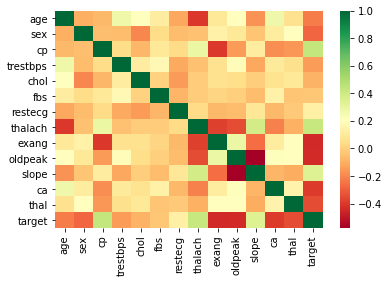

In [10]:
sns.heatmap(df.corr(),cmap="RdYlGn")

In [11]:
## Splitting training and testing ##

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
y= df["target"]
x= df.drop("target", axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)


scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve

In [14]:
## Using Logistic Regression ##
# since it is a small dataset and we only have two classes we are using Solver="liblinear"

from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

logit_model = LogisticRegression( solver="liblinear")
logit_model.fit(x_train, y_train)
y_pred = logit_model.predict(x_test)
lr=accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regressor" , accuracy_score(y_test, y_pred))



Accuracy of Logistic Regressor 0.8524590163934426


In [15]:
## using SVM with GridSearch ## 

from sklearn.svm import SVC

# Setting the parameters by cross-validation
tune_parameters = [{'kernel': ['rbf','sigmoid'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [0.1, 1, 10, 100, 1000]}]
clf = GridSearchCV(SVC(), tune_parameters, scoring="precision")
clf.fit(x_train, y_train)
print("Best Parameters Are")
print(clf.best_params_)

#Based on the best parameters we can get the result

y_pred = clf.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
svm=accuracy_score(y_test, y_pred)
print("Accuracy score for SVC is %f" %(accuracy_score(y_test, y_pred)))

Best Parameters Are
{'C': 1000, 'gamma': 0.001, 'kernel': 'sigmoid'}
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

[[25  4]
 [ 4 28]]
Accuracy score for SVC is 0.868852


In [17]:
##using KNN ##

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
knn_predicted = knn.predict(x_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn= accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[27  2]
 [ 5 27]]


Accuracy of K-NeighborsClassifier: 88.52459016393442 

              precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



In [18]:
## using Random Forest Regressor ##

from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
r_f_c = RandomForestClassifier(random_state=42)
n_estimators = [100, 300, 500, 700, 900]
max_depth = [5, 8, 10, 15, 25, 30]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 5] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(r_f_c, hyperF,  verbose = 1, n_jobs = -1)
cv_rfc = gridF.fit(x_train, y_train)
cv_rfc.best_params_


Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed: 14.3min finished


{'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 100}

In [19]:
r_f_c = RandomForestClassifier(random_state=42,max_depth=5,min_samples_leaf=5,min_samples_split=2,n_estimators=100)
r_f_c.fit(x_train,y_train)
y_pred = r_f_c.predict(x_test)
print(confusion_matrix(y_test,y_pred))
rfc=accuracy_score(y_test, y_pred)
print("Accuracy score for RFC is %f" %(accuracy_score(y_test, y_pred)))

[[24  5]
 [ 3 29]]
Accuracy score for RFC is 0.868852


In [20]:
model = pd.DataFrame({'Model': ['Logistic Regression','Random Forest',
                    'K-Nearest Neighbour','Support Vector Machine'], 'Accuracy': [lr*100,rfc*100,knn*100,svm*100]})
model

,Model,Accuracy
0,Logistic Regression,85.245902
1,Random Forest,86.885246
2,K-Nearest Neighbour,88.524590
3,Support Vector Machine,86.885246


In [22]:
## Hence, above table clearly concludes that KNN gives the better accuracy(88.526).

##Thank You